[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/mortgad/DLVR/blob/main/modelling_with_filtered_data.ipynb)

In [1]:
# Mount drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
base_dir = '/content/drive/MyDrive/Deep_Learning_Visual_Recognition/Project'
folder_name = 'UTKFace_Filtered'
metadata_file = 'UTKFace_Filtered_Metadata.csv'
filtered_images_dir = os.path.join(base_dir, folder_name)
filtered_images_metadata = os.path.join(base_dir, metadata_file)

# Load csv-file
import pandas as pd
df = pd.read_csv(filtered_images_metadata)
df.head()

,file,age_raw,gender_code,race_code,age,age_code,gender,race
0,22_1_3_20161220221656537.jpg,22,1,3,20-29,3,Female,Indian
1,39_0_4_20170104202054058.jpg,39,0,4,30-39,4,Male,Others
2,75_0_0_20170111205932368.jpg,75,0,0,70+,8,Male,White
3,3_1_4_20161221202539569.jpg,3,1,4,3-9,1,Female,Others
4,39_0_0_20170104174303275.jpg,39,0,0,30-39,4,Male,White


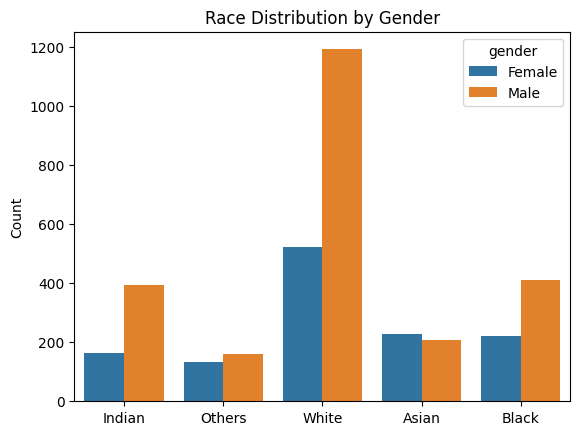

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Plotting race/ethnicity with ethnicity on the y-axis and count on the x-axis
sns.countplot(data=df, x='race', hue='gender')

# Adding plot labels
plt.title('Race Distribution by Gender')
plt.xlabel("")
plt.ylabel("Count")

# Show the plot
plt.show()

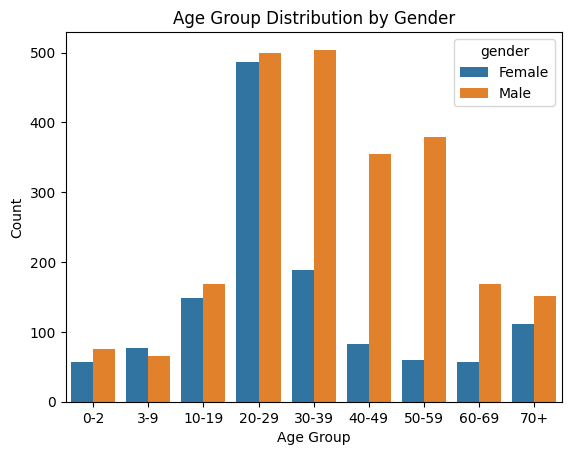

In [9]:
categories = ['0-2', '3-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70+']

# Ensure the age column in df_fairface_eda has the correct category order using .loc to avoid the warning
df.loc[:, 'age'] = pd.Categorical(df['age'], categories=categories, ordered=True)

# Now you can plot the correctly ordered age group distribution
sns.countplot(data=df, x='age', hue='gender', order=categories)

# Adding plot labels
plt.title('Age Group Distribution by Gender')
plt.xlabel('Age Group')
plt.ylabel('Count')

# Show the plot
plt.show()

In [10]:
!git clone https://github.com/mortgad/DLVR.git
%cd DLVR

Cloning into 'DLVR'...
remote: Enumerating objects: 427, done.
remote: Counting objects: 100% (285/285), done.
remote: Compressing objects: 100% (187/187), done.
remote: Total 427 (delta 168), reused 168 (delta 97), pack-reused 142 (from 1)
Receiving objects: 100% (427/427), 55.22 MiB | 16.33 MiB/s, done.
Resolving deltas: 100% (230/230), done.
/content/DLVR


In [ ]:
from utils.preprocessing import create_lists

# Preprocess df
df = df[['age_raw','gender_code','race_code','file']]
df = df[df['age_raw']<=100]
df.rename(columns={'age_raw': 'age_code'}, inplace=True)

# Create lists
images, ages, races, genders = create_lists(df)
print(f"Loaded {len(images)} images.")

# Number of classes for target variable
num_classes_age = len(set(ages))
num_classes_gender = len(set(genders))
num_classes_ethnicity = len(set(races))
print(f"Number of age classes: {num_classes_age}")
print(f"Number of gender classes: {num_classes_gender}")
print(f"Number of ethnicity classes: {num_classes_ethnicity}")